Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед Вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# ЗНАКОМСТВО С ДАННЫМИ


In [50]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('games.csv')
print(data.head(30))
data.info()

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

array([[<Axes: title={'center': 'Year_of_Release'}>,
        <Axes: title={'center': 'NA_sales'}>],
       [<Axes: title={'center': 'EU_sales'}>,
        <Axes: title={'center': 'JP_sales'}>],
       [<Axes: title={'center': 'Other_sales'}>,
        <Axes: title={'center': 'Critic_Score'}>]], dtype=object)

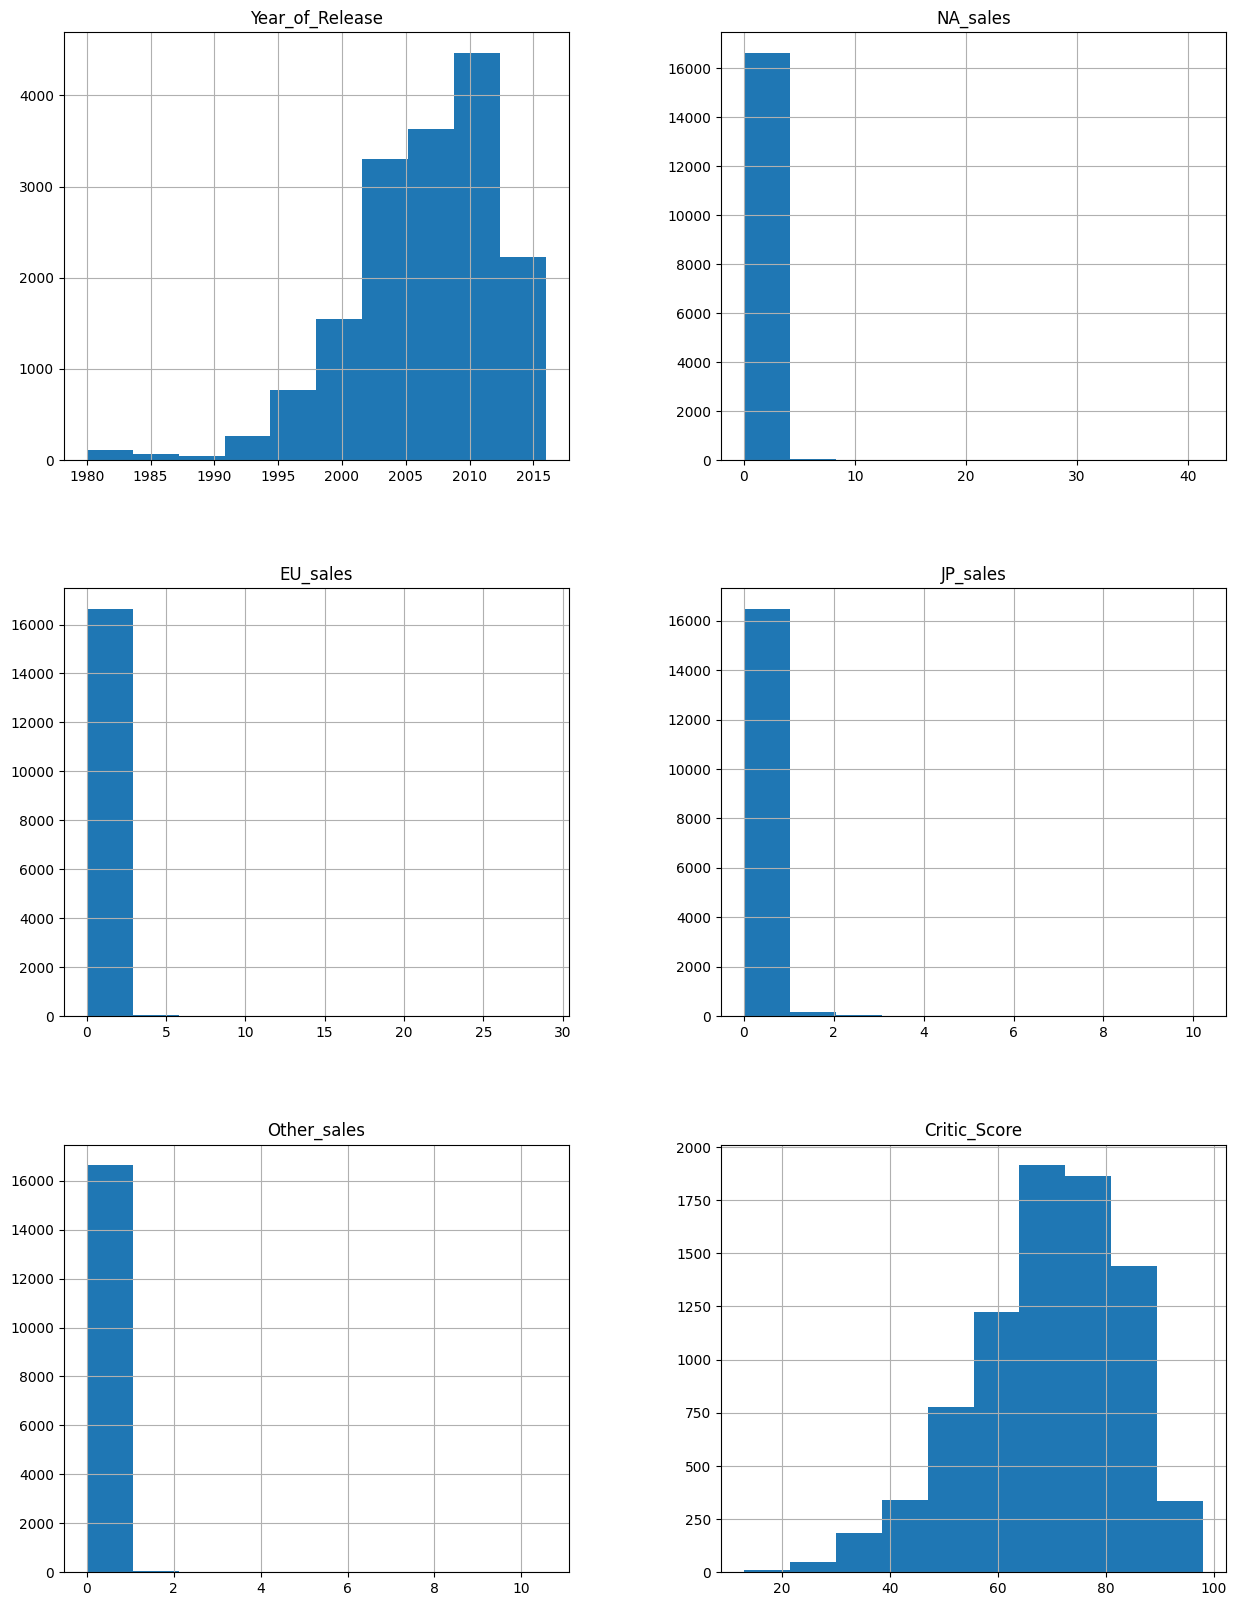

In [52]:
data.hist(figsize = (15,20))

На данном этапе я импортировала все необходимые библиотеки и ознакомилась с данными. Для всех столбцов с числовыми значениями я построила гистрограммы. Немного поговорим о распределении данных: столбец 'year_of_release'- с 2002 по 2009 постепенно происходит увеличение выпуска игр, достигает своего пика в 2009-2012 г и дальше идет на понижение вплоть до 2016 года. Большая часть значений в столбце 'critic_score' находится на уровне 64-81,в целом данные нормально распределены. В столбцах с продажами по частям света можно сказать о том,что практически все продажи игр находятся в одном ценовом диапазоне в зависимости от региона.

# ПОДГОТОВКА ДАННЫХ

In [53]:
data.columns = data.columns.str.lower()
print(data)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

Тут я привела все названия столбцов к нижнему регистру.

In [54]:
data['year_of_release']=data['year_of_release'].astype('Int64')
print(data['year_of_release'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64


Тут я изменила тип данных на Int, так как это год.

In [55]:
data['user_score'].unique()
data[data['user_score'] == 'tbd'].count()
data = data.replace({'user_score': {'tbd': np.nan}})
data['user_score'] = data['user_score'].fillna(data['user_score'].median())
data['user_score'] = data['user_score'].astype('float64')
data['user_score'].unique()

array([8. , 7.5, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

Тут я посмотрела уникальные значения в рейтинге пользователя и решила tbd('подлежит уточнению') и nan заменить на медиану, так как нам необходимо привести этот столбец к числовому типу данных для дальнейшей работы с ним. После всех преобразований у меня получился тип данных float64. Еще была идея заменить на tbt на nan,но я подумала, что потеряю слишком много данных.

In [56]:
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median())
data['critic_score'].unique()

array([76., 71., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64., 75.,
       60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47., 65.,
       54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51., 40.,
       46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23., 24.,
       21., 17., 22., 13.])

Аналогичное я сделала для рейтинга критиков. Здесь я не стала менять тип данных, так как в дальнейшем будут вычисления, в которых тип данных у рейтинга пользователей и рейтинга критиков должен совпадать с общей суммой продаж.

In [57]:
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
print(data['sum_sales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: sum_sales, Length: 16715, dtype: float64


Тут я добавила новый столбец - суммарные продажи по всем частям света.

ОБЩИЙ ВЫВОД: Поработав с данными, я пришла к выводу о том, что за 2016 год в половине столбцов пропуски и передо мной встал выбор - игнорировать этот год и сделать прогноз без него или заполнить пропуски самостоятельно и делать прогноз с данными 2016 года. Я выбрала первый вариант,так как считаю, что сильной разницы между этими вариантами нет. Причины,по которым могли возникнуть пропуски - невозможность получить часть данных, так как год еще не закончился - например, суммарные продажи(не закрыта отчетность итд, те компания еще не подводила итоги).Также причиной может стать технический сбой системы или нежелание раскрывать данные.

# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

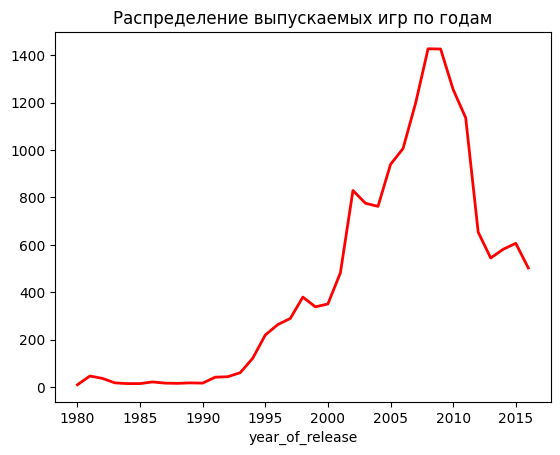

In [59]:
year_release = data.groupby('year_of_release')['name'].count()
year_release.plot(kind='line', color='red', linewidth=2, title = f'Распределение выпускаемых игр по годам')
plt.show()

C 1995 по 2006 год постепенно растет количество выпускаемых игр, пик приходится на 2007-2011 года(особенно 2008-2009),а затем идет на значительное снжение(примерно в 2 раза) вплоть до 2016 года. Для прогноза нам важен период 2012-2016 года, остальное можем не брать.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64


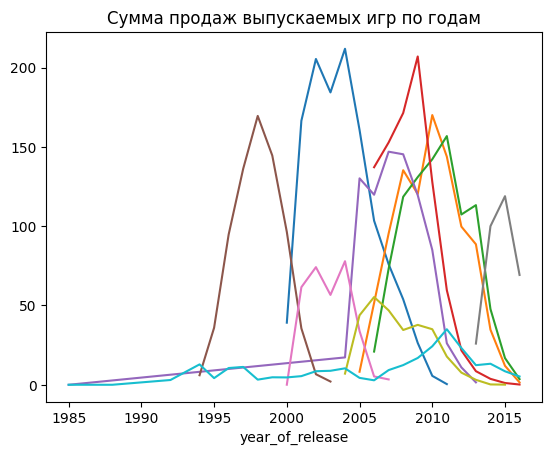

In [61]:
best_platform = data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False).head(10)
print(best_platform)
platforms = ['PS2', 'X360', 'PS3','Wii','DS','PS','GBA','PS4','PSP','PC']
for platform in platforms:
    data[data['platform']== platform].groupby('year_of_release')['sum_sales'].sum().plot(title=f'Сумма продаж выпускаемых игр по годам')

Для графика я выбрала 10 платформ с наибольшими суммарными продажами. По графику мы можем видеть то,что примерно с 2004-2005 по 2010 год исчезают старые платформы и на смену им приходят новые. После выполнения данного задания я решила окончательно взять период 2012-2015, так как в 2016 неполные данные и дальше уже работала с этими годами.

<Axes: title={'center': 'Изменение суммы продаж игр по годам и типу платформы'}, xlabel='year_of_release'>

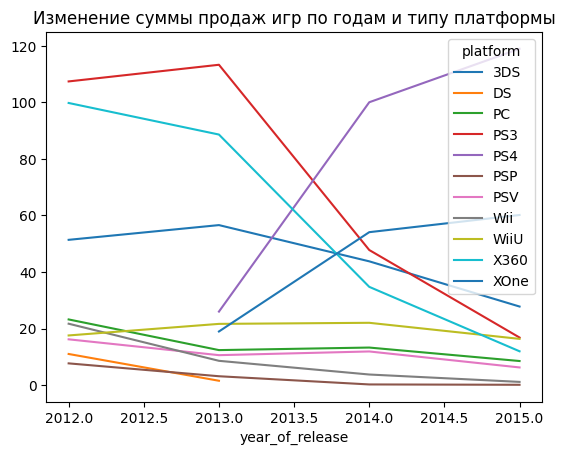

In [64]:
data2012_2015 = data[(data['year_of_release'] >= 2012) & (data['year_of_release'] < 2016)]
b = pd.pivot_table(data2012_2015, index = 'year_of_release',columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
b.plot(title = f'Изменение суммы продаж игр по годам и типу платформы')

Судя по графику, потенциально прибыльные платформы - PS4 и XOne. Они и лидируют по продажам.Потенциально прибыльной еще может быть плафторма WiiU. Платформы, которые значительно падают - 3DS,PS3,X360.

[(0.0, 1.2900000000000003), Text(0.5, 1.0, 'Ящик с усами по типам платформ')]

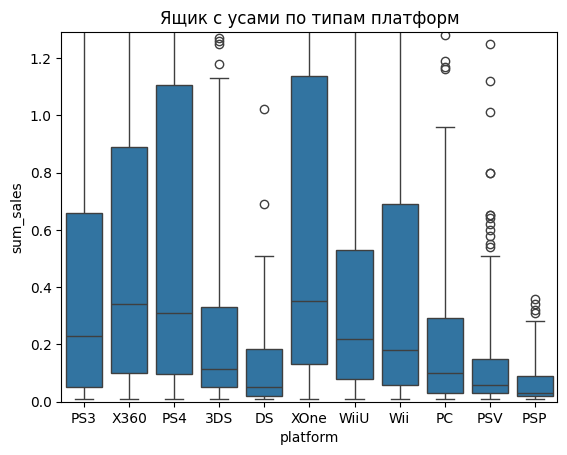

In [68]:
q = data2012_2015['sum_sales'].quantile(0.9)
pl_sum_boxplot = sns.boxplot(x="platform", y="sum_sales", whis=3, data=data2012_2015)
pl_sum_boxplot.set(ylim=(0, q),title = f'Ящик с усами по типам платформ')

Ящик с усами подтверждает тот факт, что на PS4 и XOne приходится больше всего глобальных продаж игр, меньше всего - на PSV и PSP.

Корреляция с оценкой критиков: 0.3833381059971254
Корреляция с оценкой пользователей: -0.0932881735161592


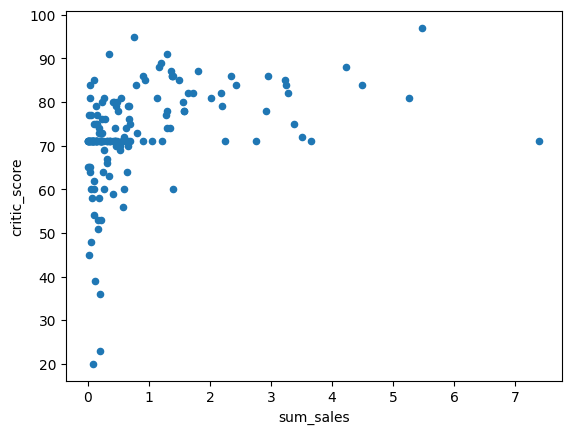

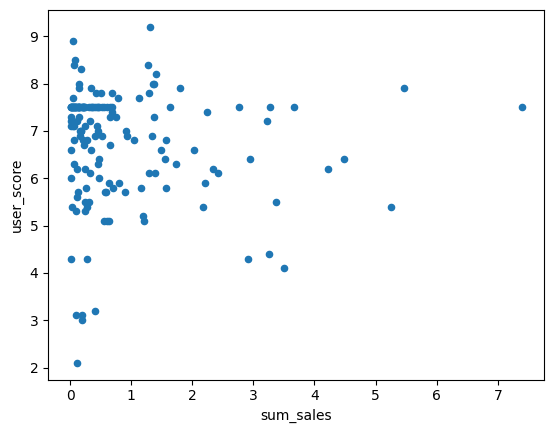

In [69]:
data_XOne = data2012_2015[data2012_2015['platform'] == 'XOne']
data_XOne.head(20)
data_XOne.plot(x = 'sum_sales',y = 'critic_score',kind = 'scatter')
data_XOne.plot(x = 'sum_sales',y = 'user_score',kind = 'scatter')
print('Корреляция с оценкой критиков:', data_XOne['sum_sales'].corr(data_XOne['critic_score']))
print('Корреляция с оценкой пользователей:', data_XOne['sum_sales'].corr(data_XOne['user_score']))

Суммарные продажи совсем не коррелируют с оценкой пользователей и слабо коррелируют с оценкой пользователей на платформе XOne.

Корреляция с оценкой критиков: 0.311298875479086
Корреляция с оценкой пользователей: 0.3251404067866232


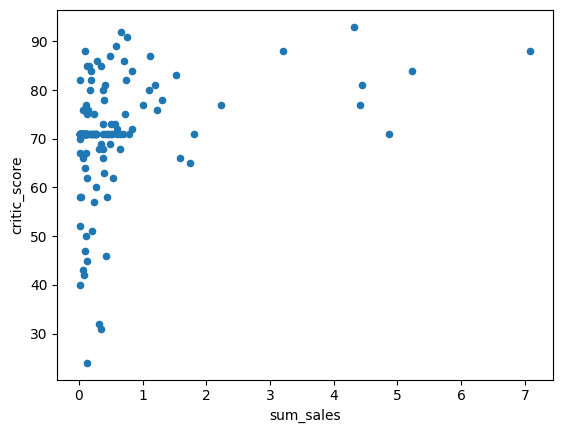

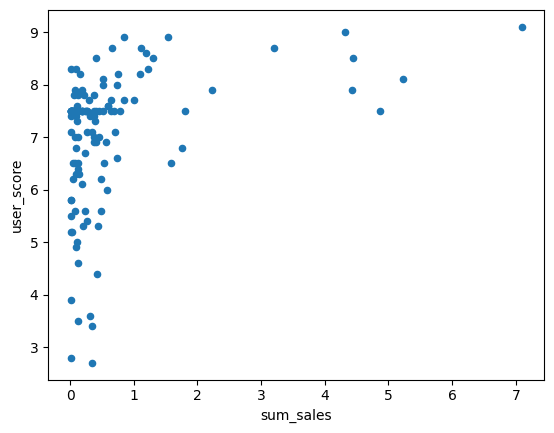

In [70]:
data_PS4 = data2012_2015[data2012_2015['platform'] == 'WiiU']
data_PS4.head(20)
data_PS4.plot(x = 'sum_sales',y = 'critic_score',kind = 'scatter')
data_PS4.plot(x = 'sum_sales',y = 'user_score',kind = 'scatter')
print('Корреляция с оценкой критиков:', data_PS4['sum_sales'].corr(data_PS4['critic_score']))
print('Корреляция с оценкой пользователей:', data_PS4['sum_sales'].corr(data_PS4['user_score']))

Для примера оставлю результат еще одной платформы WiiU. Я попробовала данный код с остальными платформами по очереди. Результаты примерно одинаковы - корреляции либо нет, либо она слабая в обоих случаях.

In [71]:
data2012_2015.groupby('genre')['sum_sales'].median().sort_values(ascending = False)

genre
Shooter         0.525
Sports          0.305
Platform        0.285
Racing          0.230
Misc            0.180
Fighting        0.160
Role-Playing    0.150
Simulation      0.150
Action          0.140
Strategy        0.080
Puzzle          0.050
Adventure       0.030
Name: sum_sales, dtype: float64

Судя по таблице, самые прибыльные жанры - shooter,sports,platform. Жанры с самыми низкими продажами - puzzle,strategy и adventure.

ОБЩИЙ ВЫВОД: В ходе иссдледовательского анализа данных мы пришли к выводу, что строить прогноз на 2017 год мы будем по временному промежутку 2012-2015 года, 2016 не берем, так как части важных для нас данных нет. В период между 2004-2005 и 2010 годами уходят старые платформы и появляются новые. Самыми прибыльными и потенциальными платформами я выбрала XOne и PS4.Платформы, которые значительно падают - 3DS,PS3,X360. На успех платформы практически не влияют ни отзывы пользователей, ни отзывы критиков,хотя отзывы критиков влияют больше, чем отзывы пользователей. Самые прибыльные жанры - shooter,sports,platform. Жанры с самыми низкими продажами - puzzle,strategy и adventure.

# ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ ПО РЕГИОНАМ

In [72]:
dolya_prodazh_na = data2012_2015['na_sales'] / data2012_2015['sum_sales']*100
dolya_prodazh_eu = data2012_2015['eu_sales'] / data2012_2015['sum_sales']*100
dolya_prodazh_jp = data2012_2015['jp_sales'] / data2012_2015['sum_sales']*100
data2012_2015_copy = data2012_2015.copy()
data2012_2015_copy['dolya_prodazh_na'] = dolya_prodazh_na
data2012_2015_copy['dolya_prodazh_eu'] = dolya_prodazh_eu
data2012_2015_copy['dolya_prodazh_jp'] = dolya_prodazh_jp
pd.pivot_table(data2012_2015_copy, index = 'platform', values = ['dolya_prodazh_na', 'dolya_prodazh_eu', 'dolya_prodazh_jp'])

,dolya_prodazh_eu,dolya_prodazh_jp,dolya_prodazh_na
platform,,,
3DS,17.754282,58.992996,20.614433
DS,57.774805,18.555881,19.643181
PC,76.096906,0.000000,17.871285
PS3,24.765851,38.421529,27.024659
PS4,40.559477,15.820047,30.427710
PSP,0.979125,98.021203,0.598814
PSV,12.535995,67.364456,13.599651
Wii,49.737587,15.839193,29.748151
WiiU,32.315877,17.148229,44.249043


Для жителей Европы ТОП-5 платформ в порядке убывания по доле продаж: PC,DS,Wii,PS4,XOne.Для жителей Японии ТОП-5 платформ в порядке убывания по доле продаж: PSP, PSV, 3DS, PS3, DS. Для жителей Южной Америки ТОП-5 платформ в порядке убывания по доле продаж: X360,XOne,WiiU,PS4,Wii. Любимые платформы Европы и Южной Америки пересекаются, а вот вкус японцев в этом плане совсем отличаются.

In [73]:
pd.pivot_table(data2012_2015,index = 'genre', values = ['na_sales','eu_sales','jp_sales'],aggfunc = 'sum')

,eu_sales,jp_sales,na_sales
genre,,,
Action,148.66,45.73,168.55
Adventure,8.14,7.06,7.97
Fighting,9.45,8.69,17.95
Misc,25.66,11.82,37.43
Platform,20.02,8.52,24.09
Puzzle,1.39,2.14,1.13
Racing,25.52,2.49,16.49
Role-Playing,44.25,58.83,58.11
Shooter,97.57,8.17,128.53


Самые популярные жанры у жителей Европы по убыванию: action,shooter, sports, role-playing, misc. Самые популярные жанры у жителей Японии по убыванию: role_playing, action, misc, simulation, fighting. Самые популярные жанры у жителей Южной Америки по убыванию: action, shooter,sports, role_playing,misc. Тут мы делаем выводы о том, что жанры Европы и Южной Америки совпадают, а вот рынок Японии сильно отличается, хоть и частично перекликается с другими рынками.

In [74]:
a = data2012_2015[data2012_2015['rating'].isnull() == True]['na_sales'].sum()
b = data2012_2015[data2012_2015['rating'].isnull() == True]['eu_sales'].sum()
c = data2012_2015[data2012_2015['rating'].isnull() == True]['jp_sales'].sum()
d = data2012_2015[data2012_2015['rating'].isnull() == False]['na_sales'].sum()
e = data2012_2015[data2012_2015['rating'].isnull() == False]['eu_sales'].sum()
f = data2012_2015[data2012_2015['rating'].isnull() == False]['jp_sales'].sum()

rating_impact = pd.DataFrame({'Южная Америка':[a,d],'Европа':[b,e],'Япония':[c,f]})
print(rating_impact)
#0 - рейтинга нет
#1 - рейтинг есть

   Южная Америка  Европа  Япония
0          94.78   84.03   94.52
1         451.26  371.57   78.75


Тут мы можем сделать вывод о том,что в Японии игры без рейтинга ESRB покупаются лучше, чем с ним,а в Южной Америке и Европе наоборот.

ОБЩИЙ ВЫВОД: Портреты игрока в Европе и Южной Америке очень сильно похожи друг на друга(особенно по части жанров),а вот рынок Японии сильно отличается как по жанрам, так и по популярным платформам. Возможно, эта разница объясняется различием менталитетов.

# ПРОВЕРКА ГИПОТЕЗ

In [75]:
row = data2012_2015[data2012_2015['platform'] == 'XOne']['user_score']
row1 = data2012_2015[data2012_2015['platform'] == 'PC']['user_score']
results = st.ttest_ind(row,row1)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4647944599325482
Не получилось отвергнуть нулевую гипотезу


H_0: Средние пользовательские рейтинги платформы XOne = Средние пользовательские рейтинги платформы PC(нужная нам гипотеза).H_1: Средние пользовательские рейтинги платформы XOne != Средние пользовательские рейтинги платформы PC.Для проверки я применила метод ttest_ind, так как обе генеральные совокупности не зависят друг от друга. Equal_var не задавала, так как выборки по размеру не сильно отличаются.

In [76]:
row = data2012_2015[data2012_2015['genre'] == 'Action']['user_score']
row1 = data2012_2015[data2012_2015['genre'] == 'Sports']['user_score']
results = st.ttest_ind(row,row1,equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 9.093575548670104e-19
Отвергаем нулевую гипотезу


H_0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанра Sports.
H_1: Средние пользовательские рейтинги жанра Action != средние пользовательские рейтинги жанра Sports(нужная нам гипотеза).
Для проверки я применила метод ttest_ind, так как обе генеральные совокупности не зависят друг от друга. Задала параметр equal_var = False, так как выборки отличаются друг от друга в несколько раз.

# ОБЩИЙ ВЫВОД

В самом начале я ознакомилась с датасетом при помощи просмотра таблицы и построения первичных гистограмм, затем обработала данные(изменила тип некоторых данных, добавила новый столбец итд), после чего провела исследовательский анализ данных, составила портрет пользователей в разных регионах и в самом конце проверила две интересные гипотезы. Вот несколько важных выводов c моей работы:
1. Потенциально прибыльные платформы - XOne и PS4.
2. На рейтинг платформ особо не влияют ни оценки пользователей, ни оценки критиков, хотя оценки критиков влияют больше.
3. Cамые прибыльные жанры - shooter,sports,platform. Жанры с самыми низкими продажами - puzzle,strategy и adventure.
4. Пользователи Европы и Южной Америки похожи друг на друга, а вот пользователи Японии сильно отличаются.
5. В Японии игры без рейтинга ESRB покупаются лучше, чем с ним,а в Южной Америке и Европе наоборот.
6. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
